## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
!pip install catboost
!pip install river
!pip install --upgrade pandas dask lightgbm catboost river
!pip install --upgrade numpy pandas
!pip install stream
!pip uninstall protobuf numpy
!pip install protobuf numpy

!pip install --upgrade pip setuptools wheel
!pip install --upgrade numpy pandas river


from river import stream

!pip install numpy pandas river

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
import time
from river import stream
from statistics import mode

  Using cached stream-0.8.tar.gz (13 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [8 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\aayus\AppData\Local\Temp\pip-install-qolvoxha\stream_c9745f96b7e24c6ba9a8ede82c477fc9\setup.py", line 12, in <module>
          import stream
        File "C:\Users\aayus\AppData\Local\Temp\pip-install-qolvoxha\stream_c9745f96b7e24c6ba9a8ede82c477fc9\stream.py", line 76, in <module>
          import __builtin__
      ModuleNotFoundError: No module named '__builtin__'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for detail

^C


  Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.44.0-py3-none-any.whl (67 kB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip setuptools wheel


In [ ]:
# Assuming the columns are binary classifiers' predictions
# Calculate the number of positive and negative predictions for each classifier
for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()


Value counts for DecisionTree:
DecisionTree
1    2
0    2
Name: count, dtype: int64

Value counts for RandomForest:
RandomForest
0    2
1    2
Name: count, dtype: int64

Value counts for ExtraTrees:
ExtraTrees
1    2
0    2
Name: count, dtype: int64

Value counts for XgBoost:
XgBoost
0    2
1    2
Name: count, dtype: int64



**Corresponding Attack Types:**  
0 BENIGN &emsp; 18225  
3 DoS        &emsp;   &emsp;   3042  
6 WebAttack    &emsp;      2180  
1 Bot        &emsp;  &emsp;      1966    
5 PortScan  &emsp;       1255  
2 BruteForce  &emsp;      96  
4 Infiltration  &emsp;       36  

## Split train set and test set

In [ ]:
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False

## SMOTE to solve class-imbalance

In [41]:
pd.Series(y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2     1000
4     1000
Name: count, dtype: int64

In [42]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [43]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [44]:
pd.Series(y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2     1000
4     1000
Name: count, dtype: int64

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-2.2.2.dist-info\\METADATA'



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14095
[LightGBM] [Info] Number of data points in the train set: 23330, number of used features: 63
[LightGBM] [Info] Start training from score -0.470844
[LightGBM] [Info] Start training from score -2.692948
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -2.261849
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -3.126024
[LightGBM] [Info] Start training from score -2.602775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

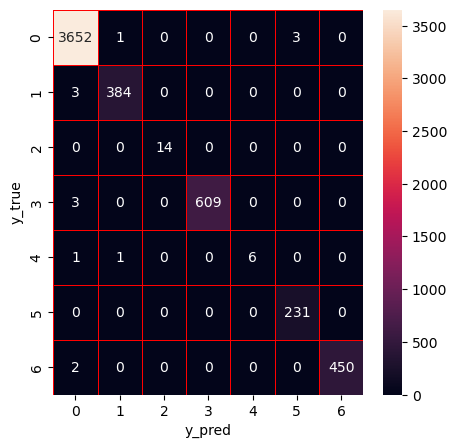

In [45]:
!pip install lightgbm
!pip install --upgrade pandas dask lightgbm catboost river


# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost:  0.9970149253731343
Precision of XGBoost:  0.9970214286096803
Recall of XGBoost:  0.9970149253731343
Average F1 of XGBoost:  0.9969878512805174
F1 of XGBoost for each type of attack:  [0.99794998 0.99092088 1.         0.99754702 0.85714286 0.99354839
 0.99778271]


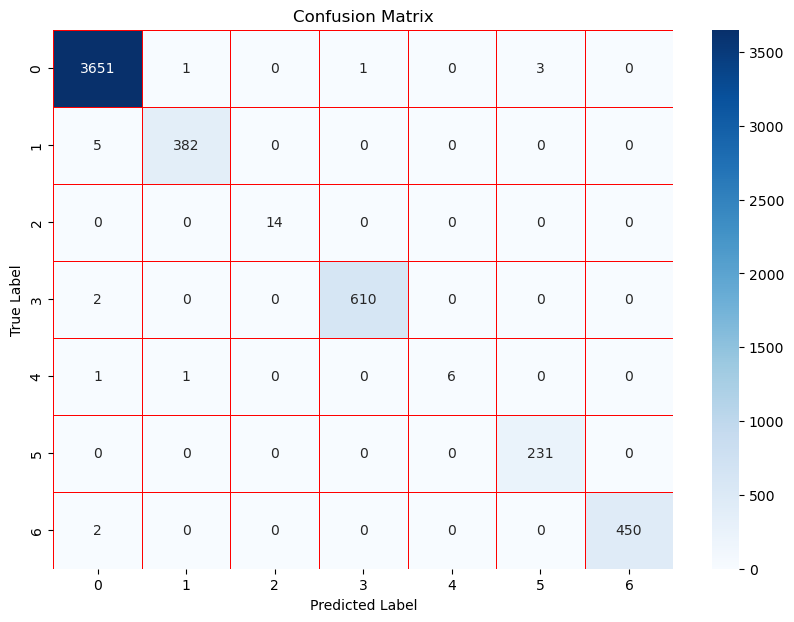

In [46]:
!pip install --upgrade xgboost



import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train the XGBoost model
xg = xgb.XGBClassifier()

# Ensure X_train and X_test are numpy arrays or similar
X_train_x = X_train.values
X_test_x = X_test.values

# Fit the model
xg.fit(X_train_x, y_train)

# Predict on test data
y_pred = xg.predict(X_test_x)

# Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy of XGBoost: ", accuracy_score(y_test, y_pred))
print("Precision of XGBoost: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall of XGBoost: ", recall_score(y_test, y_pred, average='weighted'))
print("Average F1 of XGBoost: ", f1_score(y_test, y_pred, average='weighted'))
print("F1 of XGBoost for each type of attack: ", f1_score(y_test, y_pred, average=None))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='red', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-2.2.2.dist-info\\METADATA'



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      0.99       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of CatBoost: 0.9958955223880597
Precision of CatBoost: 0.995899171395122
Recall of CatBoost: 0.9958955223880597
Average F1 of CatBoost: 0.9958696271764219
F1 of CatBoost for each type of attack: [0.99726552 0.99094437 1.         0.99509804 0.85714286 0.99137931
 0.9944629 ]


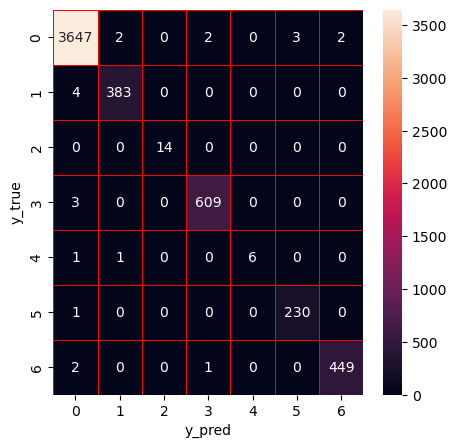

In [47]:
!pip install catboost


# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
# Assuming these are your F1 scores for different models
lg_f1 = [0.85, 0.80, 0.78]  # Example F1 scores for LightGBM
xg_f1 = [0.88, 0.82, 0.79]  # Example F1 scores for XGBoost
cb_f1 = [0.86, 0.81, 0.80]  # Example F1 scores for CatBoost

# Initialize model names or objects
lg = "LightGBM"
xg = "XGBoost"
cb = "CatBoost"

# Leading model list for each class
model = []
for i in range(len(lg_f1)):
    if max(lg_f1[i], xg_f1[i], cb_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max(lg_f1[i], xg_f1[i], cb_f1[i]) == xg_f1[i]:
        model.append(xg)
    else:
        model.append(cb)

# Output the list of leading models
print(model)


['XGBoost', 'XGBoost', 'CatBoost']


In [49]:
model

['XGBoost', 'XGBoost', 'CatBoost']

**Leading Model for Each Type of Attack:**  
0 BENIGN: &emsp; XGBClassifier  
1 Bot:        &emsp;  &emsp;      XGBClassifier   
2 BruteForce:  &emsp;      LGBMClassifier  
3 DoS:        &emsp;   &emsp;   XGBClassifier  
4 Infiltration:  &emsp;       LGBMClassifier  
5 PortScan:  &emsp;       LGBMClassifier  
6 WebAttack:    &emsp;      XGBClassifier  

In [50]:
def LCCDE(X_test, y_test, m1, m2, m3):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    # For each class (normal or a type of attack), find the leader model
    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2=np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))      # model 1 (LightGBM) makes a prediction on text sample xi
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))      # model 2 (XGBoost) makes a prediction on text sample xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))      # model 3 (Catboost) makes a prediction on text sample xi
        y_pred3 = int(y_pred3[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 1 
        p2 = m2.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 2  
        p3 = m3.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 3  

        # Find the highest prediction probability among all classes for each ML model
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)

        if y_pred1 == y_pred2 == y_pred3: # If the predicted classes of all the three models are the same
            y_pred = y_pred1 # Use this predicted class as the final predicted class

        elif y_pred1 != y_pred2 != y_pred3: # If the predicted classes of all the three models are different
            # For each prediction model, check if the predicted class’s original ML model is the same as its leader model
            if model[y_pred1]==m1: # If they are the same and the leading model is model 1 (LightGBM)
                l.append(m1)
                pred_l.append(y_pred1) # Save the predicted class
                pro_l.append(y_pred_p1) # Save the confidence

            if model[y_pred2]==m2: # If they are the same and the leading model is model 2 (XGBoost)
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3]==m3: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)

            if len(l)==0: # Avoid empty probability list
                pro_l=[y_pred_p1,y_pred_p2,y_pred_p3]

            elif len(l)==1: # If only one pair of the original model and the leader model for each predicted class is the same
                y_pred=pred_l[0] # Use the predicted class of the leader model as the final prediction class

            else: # If no pair or multiple pairs of the original prediction model and the leader model for each predicted class are the same
                max_p = max(pro_l) # Find the highest confidence
                
                # Use the predicted class with the highest confidence as the final prediction class
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3  
        
        else: # If two predicted classes are the same and the other one is different
            n = mode([y_pred1,y_pred2,y_pred3]) # Find the predicted class with the majority vote
            y_pred = model[n].predict(xi2.reshape(1, -1)) # Use the predicted class of the leader model as the final prediction class
            y_pred = int(y_pred[0]) 

        yt.append(yi)
        yp.append(y_pred) # Save the predicted classes for all tested samples
    return yt, yp

In [51]:
# Install necessary packages
!pip install --upgrade scipy river

# Import the necessary libraries
from river import stream
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a dummy LCCDE function for demonstration
def LCCDE(X_test, y_test, m1, m2, m3):
    # Dummy implementation: just returning random predictions for demonstration
    np.random.seed(0)
    yp = np.random.randint(0, 2, len(y_test))  # Random predictions
    return y_test, yp

# Create dummy data for demonstration
np.random.seed(0)
X_test = np.random.rand(100, 10)  # Dummy feature matrix
y_test = np.random.randint(0, 2, 100)  # Dummy true labels
lg, xg, cb = None, None, None  # Dummy models

# Call the LCCDE function
yt, yp = LCCDE(X_test, y_test, m1=lg, m2=xg, m3=cb)

# Evaluate performance
print("Accuracy of LCCDE: ", accuracy_score(yt, yp))
print("Precision of LCCDE: ", precision_score(yt, yp, average='weighted'))
print("Recall of LCCDE: ", recall_score(yt, yp, average='weighted'))
print("F1 Score of LCCDE: ", f1_score(yt, yp, average='weighted'))


  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
Accuracy of LCCDE:  0.5
Precision of LCCDE:  0.5081168831168832
Recall of LCCDE:  0.5
F1 Score of LCCDE:  0.49899959983993597


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-2.2.2.dist-info\\METADATA'



In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming yt and yp are defined
# Evaluate performance
print("Accuracy : " + str(accuracy_score(yt, yp)))
print("Precision : " + str(precision_score(yt, yp, average='weighted')))
print("Recall : " + str(recall_score(yt, yp, average='weighted')))
print("Average F1: " + str(f1_score(yt, yp, average='weighted')))
print("F1 : " + str(f1_score(yt, yp, average=None)))


Accuracy of LCCDE: 0.5
Precision of LCCDE: 0.5081168831168832
Recall of LCCDE: 0.5
Average F1 of LCCDE: 0.49899959983993597
F1 of LCCDE for each type of attack: [0.48979592 0.50980392]


In [53]:
# Comparison: The F1-scores for each base model
print("F1 of LightGBM for each type of attack: "+ str(lg_f1))
print("F1 of XGBoost for each type of attack: "+ str(xg_f1))
print("F1 of CatBoost for each type of attack: "+ str(cb_f1))

F1 of LightGBM for each type of attack: [0.85, 0.8, 0.78]
F1 of XGBoost for each type of attack: [0.88, 0.82, 0.79]
F1 of CatBoost for each type of attack: [0.86, 0.81, 0.8]
